<a href="https://colab.research.google.com/github/Dilavarj7/Product-Recommendation-Framework/blob/main/Product_Recommendation_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Build a recommender engine that reviews customer ratings and purchase history to recommend items and improve sales. </u></b>

### Amazon.com is one of the largest electronic commerce and cloud computing companies.

### Just a few Amazon related facts:

### They lost $4.8 million in August 2013, when their website went down for 40 mins. They hold the patent on 1-Click buying, and licenses it to Apple. Their Phoenix fulfilment centre is a massive 1.2 million square feet. Amazon relies heavily on a Recommendation engine that reviews customer ratings and purchase history to recommend items and improve sales.


### This is a dataset related to over 2 Million customer reviews and ratings of Beauty related products sold on their website.

### It contains

* ### the unique UserId (Customer Identification),
* ### the product ASIN (Amazon's unique product identification code for each product),
* ### Ratings (ranging from 1-5 based on customer satisfaction) and
* ### the Timestamp of the rating (in UNIX time)

### This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.

### This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).


## **Problem Analysis**

---
### Amazon uses recommendations as a targeted marketing tool in both email campaigns and on most of its websites pages. Amazon will recommend many products from different categories based on what you are browsing and pull those products in front of you which you are likely to buy. Like the ‘frequently bought together’ option that comes at the bottom of the product page to lure you into buying the combo. This recommendation has one main goal: increase average order value i.e., to up-sell and cross-sell customers by providing product suggestions based on the items in their shopping cart or below products they’re currently looking at on-site.
### Amazon uses browsing history of a user to always keep those products in the eye of the customer. It uses the ratings and reviews of customers to display the products with a greater average in the recommended and best selling option. Amazon wants to make you buy a package rather than one product. Say you bought a phone, it will then recommend you to buy a case or a screen protector. It will further use the recommendations from the engine to email and keep you engaged with the current trend of the product/ category.



## **WHAT ARE THE DIFFERENT TYPES OF RECOMMENDATIONS?**

---
### There are basically three important types of recommendation engines:
* Collaborative filtering
* Content-Based Filtering
* Hybrid Recommendation Systems



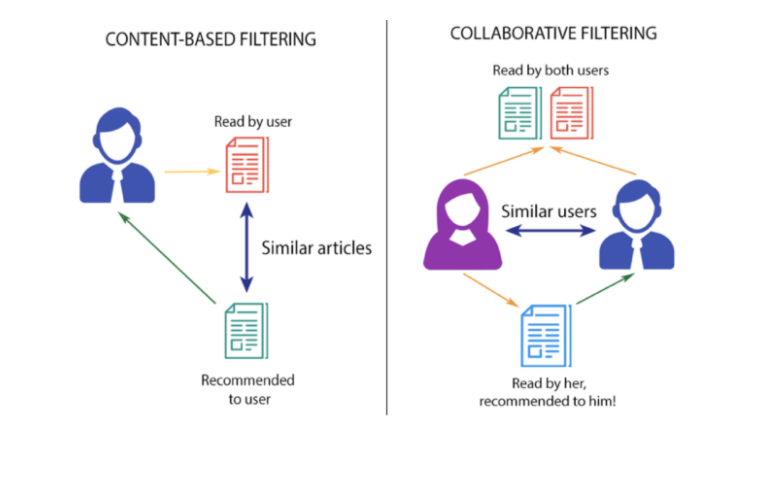

## **Importing Important Library and connecting drive**

In [ ]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Reading Dataset and first look of data.**

### **Reading First Dataset..**

In [ ]:
rating_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/ratings_Beauty.csv')

In [ ]:
# First Look
rating_df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [ ]:
rating_df.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [ ]:
rating_df.isna().sum()
# We don't have any null value in our dataset so we are good to go.

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

### **Reading second Dataset.**

In [ ]:
review_df = pd.read_json('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/reviews_Beauty_5.json.gz',lines = True)

In [ ]:
# First Look
review_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1,Don't waste your money,1391040000,"01 30, 2014"
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3,OK Palette!,1397779200,"04 18, 2014"
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4,great quality,1378425600,"09 6, 2013"
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2,Do not work on my face,1386460800,"12 8, 2013"
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3,It's okay.,1382140800,"10 19, 2013"


In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198502 entries, 0 to 198501
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      198502 non-null  object
 1   asin            198502 non-null  object
 2   reviewerName    197116 non-null  object
 3   helpful         198502 non-null  object
 4   reviewText      198502 non-null  object
 5   overall         198502 non-null  int64 
 6   summary         198502 non-null  object
 7   unixReviewTime  198502 non-null  int64 
 8   reviewTime      198502 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.6+ MB


In [ ]:
review_df.describe()

,overall,unixReviewTime
count,198502.000000,1.985020e+05
mean,4.190391,1.364450e+09
std,1.166580,3.841937e+07
min,1.000000,1.023840e+09
25%,4.000000,1.354493e+09
50%,5.000000,1.372205e+09
75%,5.000000,1.391213e+09
max,5.000000,1.406074e+09


In [ ]:
review_df.isna().sum()
# We  have some null value in our dataset for features reviewerName but it not important feature so we will not do any task for impute null value.

reviewerID           0
asin                 0
reviewerName      1386
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

# **Data Mugging, Cleaning and EDA**

### Replacing Column Name of review_df to SYNC with both DataFrame

In [ ]:
review_df=review_df.rename(columns={"reviewerID": "UserId", "asin": "ProductId"})

In [ ]:
review_rating_df = pd.merge(review_df, rating_df)

In [ ]:
review_rating_df.head(5)

,UserId,ProductId,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Rating,Timestamp
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1,Don't waste your money,1391040000,"01 30, 2014",1.0,1391040000
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3,OK Palette!,1397779200,"04 18, 2014",3.0,1397779200
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4,great quality,1378425600,"09 6, 2013",4.0,1378425600
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2,Do not work on my face,1386460800,"12 8, 2013",2.0,1386460800
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3,It's okay.,1382140800,"10 19, 2013",3.0,1382140800


### As We can See some of the features are redundent only column name is differnet. We can drop any one column from the redundent column.
1. overall	and Rating has same data but column name is different.
2. unixReviewTime and Timestamp has same data but column name is different.

In [ ]:
review_rating_df=review_rating_df.drop(['overall','unixReviewTime'],axis=1)

In [ ]:
review_rating_df.head(5)

,UserId,ProductId,reviewerName,helpful,reviewText,summary,reviewTime,Rating,Timestamp
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,Don't waste your money,"01 30, 2014",1.0,1391040000
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,OK Palette!,"04 18, 2014",3.0,1397779200
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,great quality,"09 6, 2013",4.0,1378425600
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,Do not work on my face,"12 8, 2013",2.0,1386460800
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",It's okay.,"10 19, 2013",3.0,1382140800


In [ ]:
review_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198502 entries, 0 to 198501
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UserId        198502 non-null  object 
 1   ProductId     198502 non-null  object 
 2   reviewerName  197116 non-null  object 
 3   helpful       198502 non-null  object 
 4   reviewText    198502 non-null  object 
 5   summary       198502 non-null  object 
 6   reviewTime    198502 non-null  object 
 7   Rating        198502 non-null  float64
 8   Timestamp     198502 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 15.1+ MB


In [ ]:
review_rating_df.isna().sum()
# We  have some null value in our dataset for features reviewerName but it not important feature so we will not do any task for impute null value.

UserId             0
ProductId          0
reviewerName    1386
helpful            0
reviewText         0
summary            0
reviewTime         0
Rating             0
Timestamp          0
dtype: int64

### **Let's give a first look on how the data spread:**

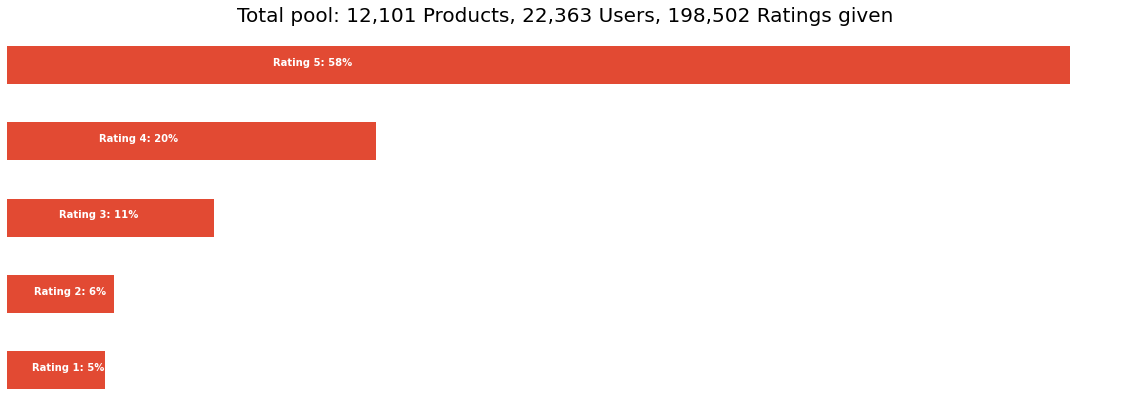

In [ ]:
p = review_rating_df.groupby('Rating')['Rating'].agg(['count'])

# get movie count
products_count = review_rating_df['ProductId'].nunique()
# get customer count
users_count = review_rating_df['UserId'].nunique()
# get rating count
rating_count = review_rating_df['UserId'].count()
#Plottng graph
ax = p.plot(kind = 'barh', legend = False, figsize = (20,7))
plt.title('Total pool: {:,} Products, {:,} Users, {:,} Ratings given'.format(products_count, users_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

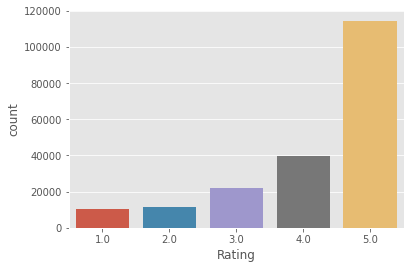

In [ ]:
# Plotting count of rating to see how it's distributed
sns.countplot(x='Rating',data=review_rating_df)

In [ ]:
review_rating_df['ProductId'].value_counts()

B004OHQR1Q    431
B0043OYFKU    403
B0069FDR96    391
B000ZMBSPE    389
B00150LT40    329
             ... 
B006OSZ00C      5
B000WUCJNY      5
B001VMJSCW      5
B00384C3SW      5
B003N209EO      5
Name: ProductId, Length: 12101, dtype: int64

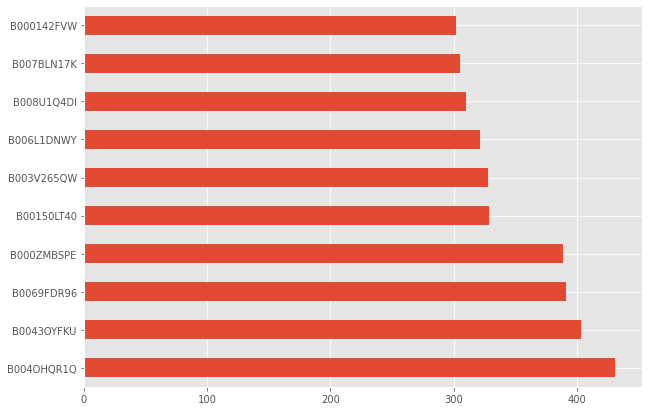

In [ ]:
# Top 10 Products
ax = review_rating_df['ProductId'].value_counts()[:10].plot(kind = 'barh', legend = False, figsize = (10,7))

In [ ]:
review_rating_df['UserId'].value_counts()

A2V5R832QCSOMX    204
ALNFHVS3SC4FV     192
AKMEY1BSHSDG7     182
A3KEZLJ59C1JVH    154
ALQGOMOY1F5X9     150
                 ... 
AJ1W2X0YD046Z       5
A1W9A6V63OOZQK      5
A3OOSRRV53HPY2      5
A2ISVZ5AJR0HFD      5
A1O7GS4P9Y12GO      5
Name: UserId, Length: 22363, dtype: int64

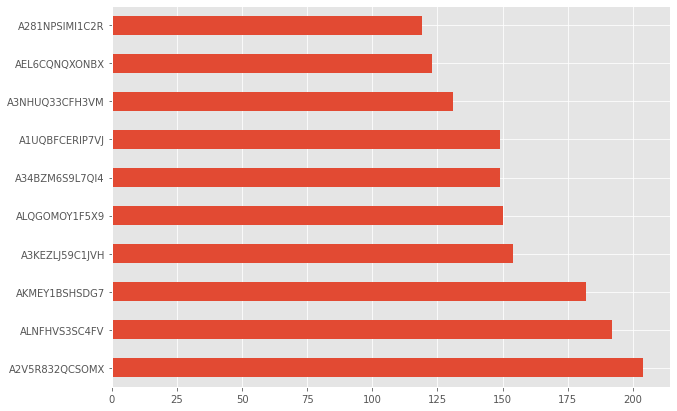

In [ ]:
# Top 10 User Id
ax = review_rating_df['UserId'].value_counts()[:10].plot(kind = 'barh', legend = False, figsize = (10,7))

### Recommender systems have a problem known as user cold-start, in which it is hard to provide personalized recommendations for users with none or a very few number of consumed items, due to the lack of information to model their preferences.  
### And for our case we have already that customer who has already made 5 purchases atleast, So we need not to worry about it.

In [ ]:
users_purchase_count_df = review_rating_df.groupby(['UserId', 'ProductId']).size().groupby('UserId').size()
print('No of Unique users: %d' % len(users_purchase_count_df))
print('Number of prurchases: %d' % len(review_rating_df))

No of Unique users: 22363
Number of prurchases: 198502


In [ ]:
review_rating_df.head(5)

,UserId,ProductId,reviewerName,helpful,reviewText,summary,reviewTime,Rating,Timestamp
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,Don't waste your money,"01 30, 2014",1.0,1391040000
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,OK Palette!,"04 18, 2014",3.0,1397779200
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,great quality,"09 6, 2013",4.0,1378425600
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,Do not work on my face,"12 8, 2013",2.0,1386460800
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",It's okay.,"10 19, 2013",3.0,1382140800


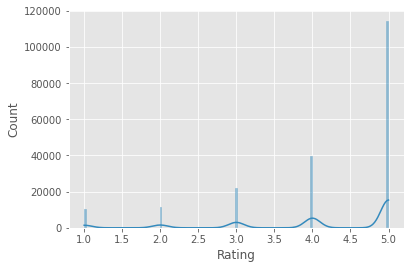

In [ ]:
sns.histplot(review_rating_df.groupby(['UserId', 'ProductId'])['Rating'].sum(),kde=True) 

### **We are applying log transformation to smooth the distribution!!**

In [ ]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
purchase_full_df = review_rating_df.groupby(['UserId', 'ProductId'])['Rating'].sum().apply(smooth_user_preference).reset_index()
print('No of unique user/item purchase: %d' % len(purchase_full_df))
purchase_full_df.head()

No of unique user/item purchase: 198502


,UserId,ProductId,Rating
0,A00414041RD0BXM6WK0GX,B007IY97U0,2.000000
1,A00414041RD0BXM6WK0GX,B00870XLDS,1.584963
2,A00414041RD0BXM6WK0GX,B008MIRO88,1.000000
3,A00414041RD0BXM6WK0GX,B00BQYYMN0,2.000000
4,A00414041RD0BXM6WK0GX,B00GRTQBTM,2.584963


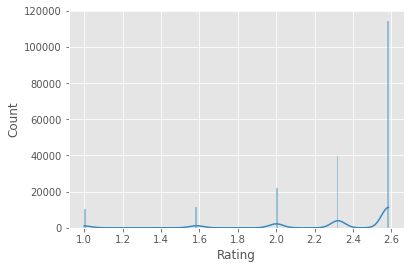

In [ ]:
sns.histplot(purchase_full_df.groupby(['UserId', 'ProductId'])['Rating'].sum(),kde=True) 

## **Splitting data into Train And Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from IPython.display import Markdown, display
from IPython.display import HTML
def printcd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [ ]:
purchase_train_df, purchase_test_df = train_test_split(purchase_full_df,
                                   stratify=purchase_full_df['UserId'], 
                                   test_size=0.20,
                                   random_state=42)
printcd('**Training and Testing Set Distribution**', color='brown')
print(f'Training set has {purchase_train_df.shape[0]} rows and {purchase_train_df.shape[1]} columns')
print(f'Testing set has {purchase_test_df.shape[0]} rows and {purchase_test_df.shape[1]} columns')

<span style='color:brown'>**Training and Testing Set Distribution**</span>

Training set has 158801 rows and 3 columns
Testing set has 39701 rows and 3 columns


# **Collaborative Filtering**

---
### Collaborative filtering (CF) is a technique used by recommender systems.In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating).


In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_products_pivot_matrix_df = purchase_train_df.pivot(index='UserId', 
                                                          columns='ProductId', 
                                                          values='Rating').fillna(0)
users_products_pivot_matrix_df.head()                                                        

ProductId,7806397051,9759091062,9788072216,9790790961,9790794231,B00004TMFE,B00004TUBL,B00004TUBV,B00004U9UY,B00004U9V2,B000050B6U,B000052WY7,B000052WYD,B000052WYL,B000052WYN,B000052X9G,B000052XIA,B000052XW5,B000052XYQ,B000052XZP,B000052XZX,B000052Y25,B000052Y33,B000052Y5F,B000052Y6Z,B000052YJC,B000052YJD,B000052YJH,B000052YJM,B000052YJX,B000052YKI,B000052YKM,B000052YKS,B000052YKY,B000052YL1,B000052YLX,B000052YM0,B000052YM3,B000052YM4,B000052YM7,...,B00KFM16OW,B00KGDRCZW,B00KH6F6TM,B00KHGIK54,B00KHH2VOY,B00KI5UL8I,B00KIEGBHE,B00KK1V28I,B00KK62714,B00KKKW03U,B00KLA4INE,B00KLJDYL2,B00KLZO2JE,B00KNIL36E,B00KNJOLSA,B00KPKIV8I,B00KQ4PEBU,B00KQBR9FM,B00KQVTX06,B00KTAJAIY,B00KTLBDYM,B00KTLBEEQ,B00KTP8Q1G,B00KVE7R0Q,B00KVO2JWC,B00KWE08Q0,B00KXG8JF4,B00L0C529Q,B00L2K53BS,B00L2KVF9W,B00L3K91OW,B00L3LB0IG,B00L3LBUGI,B00L5BXG36,B00L5JHZJO,B00L5KTZ0K,B00L6Q3BH6,B00LCEROA2,B00LG63DOM,B00LLPT4HI
UserId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A00414041RD0BXM6WK0GX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00473363TJ8YSZ3YAGG9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00700212KB3K0MVESPIY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0078719IR14X3NNUG0F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01198201H0E3GHV2Z17I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
users_products_pivot_matrix = users_products_pivot_matrix_df.values
users_products_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_products_pivot_matrix_df.index)
users_ids[:5]

['A00414041RD0BXM6WK0GX',
 'A00473363TJ8YSZ3YAGG9',
 'A00700212KB3K0MVESPIY',
 'A0078719IR14X3NNUG0F',
 'A01198201H0E3GHV2Z17I']

## **SVD - Model Based Collaborative Filtering**

---
### The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. It provides another way to factorize a matrix, into singular vectors and singular values.

#A=U.Sigma.VT


In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 35

# Performs matrix factorization of the original user item matrix
U, sigma, VT = svds(users_products_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_products_pivot_matrix.shape

(22363, 12101)

In [ ]:
U.shape

(22363, 35)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(35, 35)

In [ ]:
VT.shape

(35, 12101)

### After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet purchase, which we will exploit for recommendations.

In [ ]:
all_usera_predicted_ratings = np.dot(np.dot(U, sigma), VT) 
all_usera_predicted_ratings

array([[ 5.63170637e-05,  5.45958910e-05,  7.71392432e-06, ...,
         7.64366398e-07, -3.41438817e-07, -2.25008274e-05],
       [ 1.81072173e-05,  9.23744538e-05,  1.20901454e-04, ...,
         4.24134813e-06, -1.17100324e-04, -9.59585553e-04],
       [ 7.60701066e-05, -3.37944290e-05,  1.86552573e-04, ...,
         6.50081101e-06, -2.27556472e-04,  8.42125463e-04],
       ...,
       [ 4.52551739e-04, -7.06790097e-04,  4.47610499e-04, ...,
         1.93960494e-06, -2.67174797e-04,  2.94537016e-03],
       [-1.30477608e-05,  2.91898960e-05,  1.02040486e-04, ...,
         8.13548605e-06, -1.50526176e-04, -4.06055512e-04],
       [ 1.56507052e-04,  7.17152547e-05,  1.15210176e-04, ...,
         1.71944892e-05, -2.66837217e-04,  2.44867837e-03]])

In [ ]:
all_usera_predicted_ratings.shape

(22363, 12101)

### **Let's make DataFrame from our predicted ratings.**

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
preds_df = pd.DataFrame(all_usera_predicted_ratings, columns = users_products_pivot_matrix_df.columns, index=users_ids).transpose()
preds_df.head()

,A00414041RD0BXM6WK0GX,A00473363TJ8YSZ3YAGG9,A00700212KB3K0MVESPIY,A0078719IR14X3NNUG0F,A01198201H0E3GHV2Z17I,A02155413BVL8D0G7X6DN,A02849582PREZYNEI31CV,A029527620Q3SK5XW16RR,A03236882LUP4ARMDDMXU,A03364251DGXSGA9PSR99,A0388397363MZHRU6ALSX,A042274212BJJVOBS4Q85,A04371222UWPCRS81JO2Z,A0459829SI5B5WIOZZHX,A0508779FEO1DUNOSQNX,A05306962T0DL4FS2RA7L,A059547920Q3LZVFHLPI3,A0614215ICIJ7IVV472R,A06298653TJ91G7R7MD6R,A0647567NOSE5H95OBQ2,A06586901ZOUBJS3R268N,A0733801U845JJGV4H8V,A07420391OVT9BFTVMUOI,A08409921GVN7C8RD97CV,A0864963DOAY7LXGS5I6,A090214335ZYBWI945UJI,A0908131Z7BWYSMRQ16T,A09149312G3TQJJF59GC8,A09386383518NVR7RSA4F,A099766128UI0NCS98N1E,A100E9O4Z9BP4Q,A100L918633LUO,A100LIFNJYZWW7,A100UD67AHFODS,A100VQNP6I54HS,A100WO06OQR8BQ,A100X30Z2GCTEM,A100ZQDV7L8PVV,A1010QRG4BH51B,A101E37WFPUEII,...,AZRPMQ8A4H0W4,AZS23E3IKSF9D,AZS4UNYSAZVG8,AZS5TOKUYLDO0,AZS9WNWY48XF5,AZSWYOYUCD81E,AZTYMMD36CXY2,AZTZ7SIIRXLXE,AZU2UCJP6WUQO,AZUEKJ6P9TFSJ,AZUH2MX87LX7J,AZUH5XSJ2NLXR,AZUPWQFWXZYE9,AZV2AG96CRJ26,AZV7CNMMJERKW,AZVM27SJPO3GL,AZW9UD7Z7J0WL,AZWJAXOQMB8EK,AZWXG6KBXXC2N,AZWZF1F7QCPSE,AZX1JTTIUYZX4,AZX5U35YDZZXI,AZXH0JC9KOLU8,AZXP46IB63PU8,AZY3Z9QI0G8L,AZY8RW6L7W52Z,AZYA6NBTF2843,AZYAFW3CRARM6,AZYH32578YZBF,AZYN9RRLZUNVA,AZYNK58DULI59,AZYVVBYSD74KP,AZZ5ASC403N74,AZZ91VNEU3XYX,AZZIOU48NE8PC,AZZNK89PXD006,AZZQXL8VDCFTV,AZZT1ERHBSNQ8,AZZU6NXB8YJN9,AZZZLM1E5JJ8C
ProductId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7806397051,0.000056,0.000018,0.000076,-0.000218,-0.000807,-0.000016,0.000711,-0.000190,-0.000524,0.002148,0.000107,0.000083,0.000040,0.000080,0.000329,0.000347,0.001176,0.000048,0.000095,0.000131,0.000006,0.000168,0.000072,0.000019,0.000399,0.000489,-0.000113,0.000065,0.000648,0.000903,0.000814,0.000021,0.000072,0.000010,0.000240,0.001125,-0.000009,-0.000132,-0.000477,-0.000076,...,-0.000560,0.000057,0.000365,0.000086,0.001667,0.000010,0.000119,0.000047,0.000144,-0.000054,-0.000220,0.000131,0.000152,0.000445,-0.000425,-0.000073,0.000051,0.000162,0.000047,-0.000002,0.000117,0.000058,0.000008,-0.000183,0.000095,0.000266,0.000202,-0.000115,0.000046,0.000823,2.122282e-05,0.000064,-0.000166,0.000046,0.000036,0.000019,0.000255,0.000453,-0.000013,0.000157
9759091062,0.000055,0.000092,-0.000034,-0.000336,-0.000190,-0.000063,-0.000194,-0.000228,-0.000049,-0.000943,0.000084,0.000167,-0.000032,0.000111,0.000128,0.000170,0.000623,0.000031,0.000076,0.000154,0.000049,-0.000266,0.000043,-0.000013,0.000804,0.000903,-0.000075,-0.000007,0.000269,0.000853,0.001216,0.000035,0.000089,0.000006,0.000349,0.003333,0.000036,-0.000203,-0.001274,0.000093,...,-0.000074,-0.000042,0.000288,0.000022,0.000486,-0.000015,0.000126,0.000071,-0.000150,-0.000004,0.000030,-0.000140,-0.000075,0.000450,-0.000029,-0.000083,-0.000009,-0.000021,0.000077,-0.000016,-0.000053,-0.000015,0.000009,-0.000515,0.000154,0.000472,0.000206,0.000010,0.000030,-0.000267,-5.168876e-07,-0.000051,0.000121,-0.000056,-0.000049,-0.000015,-0.000089,-0.000707,0.000029,0.000072
9788072216,0.000008,0.000121,0.000187,0.000046,0.000138,-0.000004,0.000053,0.000155,0.000205,0.001621,0.000041,0.000142,0.000016,0.000163,0.000369,0.000694,0.000326,0.000035,0.000038,0.000183,0.000371,0.000638,0.000054,0.000022,0.000107,0.000182,0.000089,0.000150,0.000267,0.000500,0.000293,0.000050,0.000038,0.000032,0.000618,-0.000659,-0.000006,0.000284,-0.000274,0.000050,...,0.000171,0.000091,0.000103,0.000366,0.000166,0.000041,0.000068,0.000198,0.000057,0.000129,-0.000092,0.000153,-0.000158,0.000150,-0.000045,0.000132,0.000097,0.000143,0.000105,0.000029,0.000105,0.000062,0.000033,0.001114,0.000086,0.000168,0.000131,-0.000021,0.000042,0.000383,1.671252e-05,0.000264,0.000088,0.000072,0.000011,0.000028,0.000258,0.000448,0.000102,0.000115
9790790961,0.000222,0.000351,-0.000056,0.012612,0.004910,-0.000123,0.003826,-0.001002,-0.001617,0.004094,0.000237,-0.000001,0.000433,0.000059,0.001295,-0.000339,0.004445,0.000082,0.000251,0.000679,0.000914,0.002261,0.000618,0.000036,0.000914,0.001026,0.000009,

In [ ]:
preds_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12101 entries, 7806397051 to B00LLPT4HI
Columns: 22363 entries, A00414041RD0BXM6WK0GX to AZZZLM1E5JJ8C
dtypes: float64(22363)
memory usage: 2.0+ GB


In [ ]:
len(preds_df)

12101

## **CFRecommender Class**

In [ ]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ProductId'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        return recommendations_df


cf_recommender_model = CFRecommender(preds_df)     

### In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

### This evaluation method works as follows:

* ### For each user
    * ### For each item the user has interacted in test set
        * ### Sample 100 other items the user has never interacted.   
        * ### Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        * ### Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* ### Aggregate the global Top-N accuracy metrics

In [ ]:
#Indexing by personId to speed up the searches during evaluation
purchases_full_indexed_df = purchase_full_df.set_index('UserId')
purchases_train_indexed_df = purchase_train_df.set_index('UserId')
purchases_test_indexed_df = purchase_test_df.set_index('UserId')

### The Top-N accuracy metric choosen was **Recall@N** which evaluates whether the interacted item is among the top N items (hit) in the ranked list of 101 recommendations for a user.

In [ ]:
def get_product_purchased(UserId, review_rating_df):
    purchased_product = review_rating_df.loc[UserId]['ProductId']
    return set(purchased_product if type(purchased_product) == pd.Series else [purchased_product])

In [ ]:
import random

In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_purchased_products_sample(self, UserId, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=42):
        purchased_products = get_product_purchased(UserId, purchases_full_indexed_df)
        all_products = set(review_rating_df['ProductId'])
        non_purchased_products = all_products - purchased_products

        random.seed(seed)
        non_purchased_products_sample = random.sample(non_purchased_products, sample_size)
        return set(non_purchased_products_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        purchased_values_testset = purchases_test_indexed_df.loc[person_id]
        
        if type(purchased_values_testset['ProductId']) == pd.Series:
            users_purchased_products_testset = set(purchased_values_testset['ProductId'])
        else:
            users_purchased_products_testset = set([(purchased_values_testset['ProductId'])])
            
        purchased_products_count_testset = len(users_purchased_products_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_product_purchased(person_id, purchases_train_indexed_df),topn=10000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        hits_at_15_count = 0
        
        # For each item the user has interacted in test set
        for item_id in users_purchased_products_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_purchased_products_sample = self.get_not_purchased_products_sample(person_id,seed=item_id)

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_purchased_products_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ProductId'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ProductId'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
            hit_at_15, index_at_15 = self._verify_hit_top_n(item_id, valid_recs, 15)
            hits_at_15_count += hit_at_15

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(purchased_products_count_testset)
        recall_at_10 = hits_at_10_count / float(purchased_products_count_testset)
        recall_at_15 = hits_at_15_count / float(purchased_products_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'hits@15_count':hits_at_15_count,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10,
                          'recall@15': recall_at_15,
                          'interacted_count': purchased_products_count_testset}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(purchases_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['UserId'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_15 = detailed_results_df['hits@15_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10,
                          'recall@15': global_recall_at_15}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

## **Test Case1:**

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
22362 users processed


In [ ]:
print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)


Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.3850532732172993, 'recall@10': 0.47598297272109014, 'recall@15': 0.5350998715397597}


,hits@5_count,hits@10_count,hits@15_count,recall@5,recall@10,recall@15,interacted_count,UserId
1263,6,11,14,0.146341,0.268293,0.341463,41,A2V5R832QCSOMX
1094,36,36,36,0.923077,0.923077,0.923077,39,ALNFHVS3SC4FV
210,15,19,23,0.405405,0.513514,0.621622,37,AKMEY1BSHSDG7
1989,3,8,12,0.096774,0.258065,0.387097,31,A3KEZLJ59C1JVH
1711,18,18,18,0.600000,0.600000,0.600000,30,A34BZM6S9L7QI4
197,2,7,9,0.066667,0.233333,0.300000,30,ALQGOMOY1F5X9
992,28,29,29,0.933333,0.966667,0.966667,30,A1UQBFCERIP7VJ
137,23,23,23,0.884615,0.884615,0.884615,26,A3NHUQ33CFH3VM
545,21,22,22,0.840000,0.880000,0.880000,25,AEL6CQNQXONBX
1761,3,6,8,0.125000,0.250000,0.333333,24,A281NPSIMI1C2R


### Yay! With personalized recommendations of content-based filtering model, we have a jump on **Recall@5** to about **0.3847**, which means that about **38%** of interacted items in test set were ranked by this model among the top-5 items (from lists with 100 random items).  
### And **Recall@10** was **0.47590 (47%)** and **Recall@15** was **0.5358 (53%)**.Definitelly not bad!.


# <b> Content-Based Filtering </b>

---
### This method uses only information about the description and attributes of the items users has previously consumed to model user's preferences. In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present). In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended. 

In [ ]:
#Indexing by personId to speed up the searches during evaluation
purchases_full_indexed_df = purchase_full_df.set_index('UserId')
purchases_train_indexed_df = purchase_train_df.set_index('UserId')
purchases_test_indexed_df = purchase_test_df.set_index('UserId')

## **Obtain vector embeddings of each word in our corpus**

### To do this we use the TF-IDF Vectorizer technique 

* ### Term Frequency (TF) - How many times a particular word appears in a single document?
* ### Inverse Document Frequency (IDF) - It is calculated by taking the log of {number of docs in your corpus divided by the number of docs in which this term appears}. This takes care of words which are present rarely across the corpus.

In [ ]:
review_rating_df.head(2)

,UserId,ProductId,reviewerName,helpful,reviewText,summary,reviewTime,Rating,Timestamp
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,Don't waste your money,"01 30, 2014",1.0,1391040000
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,OK Palette!,"04 18, 2014",3.0,1397779200


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
#Ignoring stopwords (words with no semantics) from English and Portuguese (as we have a corpus with mixed languages)
stopwords_list = stopwords.words('english')

#Trains a model whose vectors size is 5000, composed by the main unigrams and bigrams found in the corpus, ignoring stopwords
vectorizer = TfidfVectorizer(analyzer='word',
                     ngram_range=(1, 2),
                     min_df=0.003,
                     max_df=0.5,
                     max_features=3000,
                     stop_words=stopwords_list)

item_ids = review_rating_df['ProductId'].tolist()
tfidf_matrix = vectorizer.fit_transform(review_rating_df['reviewText'] + "" + review_rating_df['summary'])
tfidf_feature_names = vectorizer.get_feature_names()
tfidf_matrix

<198502x2366 sparse matrix of type '<class 'numpy.float64'>'
	with 6780848 stored elements in Compressed Sparse Row format>

In [ ]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
tfidf_feature_names

['00',
 '10',
 '10 minutes',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '15 minutes',
 '16',
 '20',
 '20 minutes',
 '24',
 '25',
 '2nd',
 '30',
 '30 minutes',
 '34',
 '40',
 '45',
 '50',
 '60',
 '8217',
 '99',
 'able',
 'able use',
 'absolute',
 'absolutely',
 'absolutely love',
 'absorb',
 'absorbed',
 'absorbs',
 'absorbs quickly',
 'accidentally',
 'achieve',
 'acid',
 'acne',
 'acne prone',
 'across',
 'acrylic',
 'active',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'adds',
 'admit',
 'adult',
 'advertised',
 'affordable',
 'afraid',
 'african',
 'african american',
 'afterwards',
 'age',
 'aging',
 'ago',
 'agree',
 'air',
 'air dry',
 'alcohol',
 'allergic',
 'allergies',
 'allow',
 'allows',
 'almond',
 'almost',
 'almost like',
 'aloe',
 'alone',
 'along',
 'alot',
 'already',
 'also',
 'also great',
 'also like',
 'also love',
 'also use',
 'also used',
 'alternative',
 'although',
 'always',
 'always use',
 'amazed',
 'amazing',
 'amazi

In [ ]:
from scipy.sparse import vstack
from sklearn.preprocessing import normalize

In [ ]:
def get_item_profile(item_id):
    idx = item_ids.index(item_id)
    item_profile = tfidf_matrix[idx:idx+1]
    return item_profile

In [ ]:
def get_item_profiles(ids):
    item_profiles_list = [get_item_profile(x) for x in ids]
    item_profiles = vstack(item_profiles_list)
    return item_profiles

In [ ]:
def build_users_profile(user_id, purchased_indexed_df):
    purchases_user_df = purchased_indexed_df.loc[user_id]
    user_product_profiles = get_item_profiles(purchases_user_df['ProductId'])
    
    user_product_strengths = np.array(purchases_user_df['Rating']).reshape(-1,1)
    
    # Weighted average of item profiles by the interactions strength
    user_product_strengths_weighted_avg = np.sum(user_product_profiles.multiply(user_product_strengths), axis=0) / np.sum(user_product_strengths)
    user_profile_norm = normalize(user_product_strengths_weighted_avg)
    return user_profile_norm

In [ ]:
def build_users_profiles(): 
    purchased_indexed_df = purchase_full_df[purchase_full_df['ProductId'].isin(review_rating_df['ProductId'])].set_index('UserId')
    user_profiles = {}
    for user_id in purchased_indexed_df.index.unique():
        user_profiles[user_id] = build_users_profile(user_id, purchased_indexed_df)
    return user_profiles

In [ ]:
user_profiles = build_users_profiles()

In [ ]:
len(user_profiles)

22363

### Let's take a look at a particular user profile. It is a unit vector of atmost 3000 length. The value in each position represents how relevant is a token (unigram or bigram) for the selected user

In [ ]:
user_profile = user_profiles['A00414041RD0BXM6WK0GX']
print(user_profile.shape)

# Making A DataFrame to store the result...
pd.DataFrame(sorted(zip(tfidf_feature_names,user_profiles['A00414041RD0BXM6WK0GX'].flatten().tolist()), key=lambda x: -x[1])[:20],columns=['token', 'relevance'])

(1, 2366)


,token,relevance
0,wig,0.715549
1,head,0.286604
2,fit,0.170562
3,average,0.140115
4,cap,0.139048
5,entire,0.123835
6,come,0.121345
7,hair,0.114995
8,fabulous,0.114200
9,mention,0.113886


### Looking at this user's profile, it appears that the top relevant tokens really represent  his interest in **wig**, **head** and **fit**!

## **Class for Content-Based Filtering**

In [ ]:
import random

In [ ]:
class ContentBasedRecommender:
    
    MODEL_NAME = 'Content-Based'
    
    def __init__(self, products_df=None):
        self.item_ids = item_ids
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def _get_similar_products_to_user_profile(self, person_id, topn=1000):
        
        # Compute the cosine similarity between the user profile and all item profiles
        cosine_similarities = cosine_similarity(user_profiles[person_id], tfidf_matrix)
        
        # Get the top similar items
        similar_indices = cosine_similarities.argsort().flatten()[-topn:]
        
        # Sort the similar items by similarity
        similar_items = sorted([(item_ids[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
        return similar_items
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        similar_items = self._get_similar_products_to_user_profile(user_id)
        
        #Ignores items the user has already interacted
        similar_items_filtered = list(filter(lambda x: x[0] not in items_to_ignore, similar_items))
        
        recommendations_df = pd.DataFrame(similar_items_filtered, columns=['ProductId', 'recStrength']).head(topn)



        return recommendations_df
    
content_based_recommender_model = ContentBasedRecommender()

## Evaluation

In [ ]:
def get_product_purchased(person_id, purchases_df):
    purchased_product = purchases_df.loc[person_id]['ProductId']
    return set(purchased_product if type(purchased_product) == pd.Series else [purchased_product])

In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of products which a user has not purchased with
    def get_not_purchased_products_sample(self, UserId, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=42):
        purchased_products = get_product_purchased(UserId, purchases_full_indexed_df)
        all_products = set(review_rating_df['ProductId'])
        non_purchased_products = all_products - purchased_products

        random.seed(seed)
        non_purchased_products_sample = random.sample(non_purchased_products, sample_size)
        return set(non_purchased_products_sample)

    # Function to verify whether a particular product_id was present in the set of top N recommended products
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        purchased_values_testset = purchases_test_indexed_df.loc[person_id]
        
        if type(purchased_values_testset['ProductId']) == pd.Series:
            users_purchased_products_testset = set(purchased_values_testset['ProductId'])
        else:
            users_purchased_products_testset = set([(purchased_values_testset['ProductId'])])
            
        purchased_products_count_testset = len(users_purchased_products_testset)  

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_product_purchased(person_id, purchases_train_indexed_df),topn=10000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        hits_at_15_count = 0
        
        # For each product the user has purchased in test set
        for item_id in users_purchased_products_testset:
            
            # Getting a random sample of 100 products the user has not purchased with
            non_purchased_products_sample = self.get_not_purchased_products_sample(person_id,seed=item_id)

            # Combining the current purchased product with the 100 random items
            items_to_filter_recs = non_purchased_products_sample.union(set([item_id]))

            # Filtering only recommendations that are either the purchased product or from a random sample of 100 non-purchased product
            valid_recs_df = person_recs_df[person_recs_df['ProductId'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ProductId'].values
            
            # Verifying if the current purchased product is among the Top-N recommended products
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
            hit_at_15, index_at_15 = self._verify_hit_top_n(item_id, valid_recs, 15)
            hits_at_15_count += hit_at_15

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(purchased_products_count_testset)
        recall_at_10 = hits_at_10_count / float(purchased_products_count_testset)
        recall_at_15 = hits_at_15_count / float(purchased_products_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'hits@15_count':hits_at_15_count,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10,
                          'recall@15': recall_at_15,
                          'interacted_count': purchased_products_count_testset}
        return person_metrics

    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(purchases_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['UserId'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_15 = detailed_results_df['hits@15_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10,
                          'recall@15': global_recall_at_15}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()      

In [ ]:
print('Evaluating Content-Based Filtering model...')
cb_global_metrics, cb_detailed_results_df = model_evaluator.evaluate_model(content_based_recommender_model)

Evaluating Content-Based Filtering model...
22362 users processed


In [ ]:
print('\nGlobal metrics:\n%s' % cb_global_metrics)


Global metrics:
{'modelName': 'Content-Based', 'recall@5': 0.837988967532304, 'recall@10': 0.8630009319664492, 'recall@15': 0.8680637767310647}


In [ ]:
cb_detailed_results_df.head(5)

,hits@5_count,hits@10_count,hits@15_count,recall@5,recall@10,recall@15,interacted_count,UserId
1263,7,10,10,0.170732,0.243902,0.243902,41,A2V5R832QCSOMX
1094,12,14,15,0.307692,0.358974,0.384615,39,ALNFHVS3SC4FV
210,5,6,7,0.135135,0.162162,0.189189,37,AKMEY1BSHSDG7
1989,4,6,7,0.129032,0.193548,0.225806,31,A3KEZLJ59C1JVH
1711,7,9,9,0.233333,0.300000,0.300000,30,A34BZM6S9L7QI4


In [ ]:
cb_detailed_results_df.tail(5)

,hits@5_count,hits@10_count,hits@15_count,recall@5,recall@10,recall@15,interacted_count,UserId
10717,1,1,1,1.0,1.0,1.0,1,A2CMHND1J2REXO
10718,1,1,1,1.0,1.0,1.0,1,AT9IIRZG9EA
10719,1,1,1,1.0,1.0,1.0,1,A9V313DO1PZTF
10720,1,1,1,1.0,1.0,1.0,1,A18I3C6E5VKADI
22362,1,1,1,1.0,1.0,1.0,1,A3U46FFN9OP7BL


### Yay! With personalized recommendations of content-based filtering model, we have a jump on **Recall@5** to about **0.8381**, which means that about **83%** of interacted items in test set were ranked by this model among the top-5 items (from lists with 100 random items).  
### And **Recall@10** was **0.8600 (86%)** and **Recall@15** was **0.8680 (87%)**. We are getting good result.


# **Conclusion**

---
From above we can conclude below points
* We got recall@5: 0.3847 and recall@10: 0.4759 for collaborative Model.
* We got recall@5: 0.83814 and recall@10: 0.8630 for content-based Model.
* As we can see We are getting better recall value for content-based model than collaborative model.
* So we can conclude that content-based model is optimal model for product recommendation.
